In [196]:
#IMPORTS
import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

#SET SEED
seed_value = 42

import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [197]:
data_dir = 'River_Images'  # 'datasets' is at the same level as your notebook
image_size = (131, 131) #Set image size
batch_size = 16
#test
test_data = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, 'test'),
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

Found 6 files belonging to 2 classes.


In [198]:
# TRAIN
image_size = (131, 131)
batch_size = 16
train_data = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

Found 52 files belonging to 2 classes.


In [199]:
#VAL
image_size = (131, 131)
batch_size = 16
validation_data = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, 'validation'),
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42
) 

Found 6 files belonging to 2 classes.


In [200]:
# Convert datasets to NumPy arrays
import numpy as np
train_images, train_labels = zip(*[(image, label) for image, label in train_data.as_numpy_iterator()])

validation_images, validation_labels = zip(*[(image, label) for image, label in validation_data.as_numpy_iterator()])

test_images,test_labels= zip(*[(image, label) for image, label in test_data.as_numpy_iterator()])
#train set
X_train = np.concatenate(train_images, axis=0)
y_train = np.concatenate(train_labels, axis=0)

#val
X_val = np.concatenate(validation_images, axis=0) 
y_val = np.concatenate(validation_labels, axis=0)

#test
X_test = np.concatenate(test_images, axis=0)
y_test = np.concatenate(test_labels, axis=0)

In [201]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(52, 2)
(6, 2)
(6, 2)


In [202]:
#normalizing, reshaping and encoding
#X_train = X_train.reshape(X_train.shape[0], 128, 128, 1).astype('float32')#redundant
#X_test = X_test.reshape(X_test.shape[0], 128, 128, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255

# Creating base model for image size 131x131

In [203]:
base_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(131, 131, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='sigmoid') #final hv to b the same
])

base_model.compile(optimizer='adam',
              loss='binary_crossentropy', #'categorical_crossentropy',
              metrics=['accuracy'])

history_base_model=base_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=8)

test_loss, test_accuracy = base_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# base_model.save_weights('baseModel_CNN weights.h5')
#base_model.load_weights('baseModel weights.h5')

Epoch 1/8
4/4 [==============================] - 1s 86ms/step - loss: 0.6935 - accuracy: 0.4423 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/8
4/4 [==============================] - 0s 52ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/8
4/4 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/8
4/4 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/8
4/4 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/8
4/4 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/8
4/4 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/8
1/1 [===================

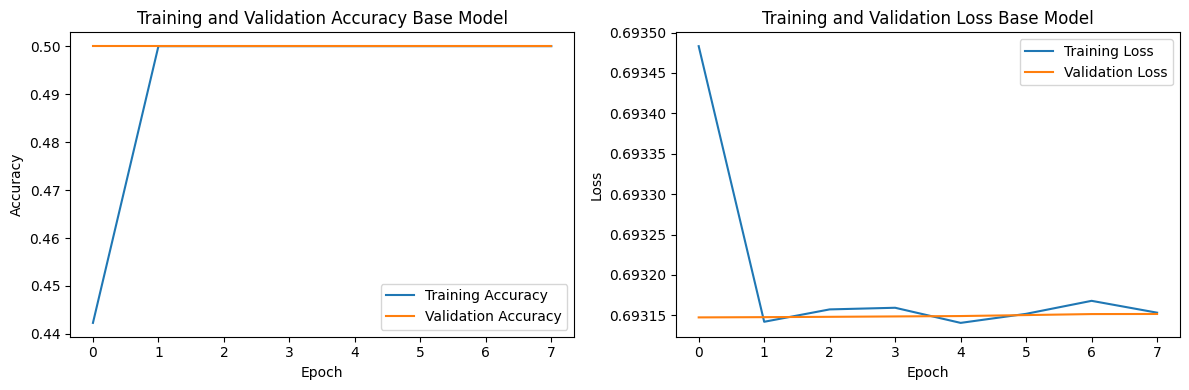

In [204]:
train_accuracy = history_base_model.history['accuracy']
val_accuracy = history_base_model.history['val_accuracy']
train_loss = history_base_model.history['loss']
val_loss = history_base_model.history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Base Model')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Base Model')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation of base model:
Low Accuracy: The training, validation, and test accuracies are all very low, with a test accuracy score of 0.07, indicating that the model is performing poorly on the task. Validation accuracy stayed stagnant at 0.06 throughout all epochs.

Overfitting: There seems to be a significant gap between the training and validation accuracies, suggesting that the model may be overfitting to the training data.

Unbalanced Classes: The low accuracy could also be due to class imbalance in the dataset. If there are imbalanced classes, the model may struggle to learn from the minority class samples.

# Tuning parameters:
Learning rate: prevents overfitting, determines the size of the steps taken during the optimization process

Decay_steps: How often the learning rate should be updated. if decay_step = 1000, the learning rate might be updated every 1000 training iterations.

Decay_rate: if decay_rate = 0.9, the learning rate might be reduced to 90% of its previous value during each update.

monitor: what the callback monitors b4 stopping training. eg (val_loss)

min_delte, if min_delta=0.001, training will only stop if there is less than a 0.001 improvement in the monitored metric.

patieple, if patience=5, the training will stop if there is no improvement in the monitored metric for 5 consecutive epochs.

verbose: It controls the amount of information printed during training. If verbose=1, it will print a message when the training stops due to early stauto,min,max.opping.

mode: This defines whether the monitored metric should be maximized or minimized. It can be set to one of three values: 'auto', 'min', or 'max'. If 'auto', the mode is inferred from the name of the monitored metric. If 'min', training will stop when the quantity monitored has stopped decreasing. If 'max', training will stop when the quantity monitored has stopped increasing.

# Model building
Determing layers and parameters

In [205]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the LeNet model with dropout
ownModel = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(131, 131, 3)),
    layers.MaxPooling2D((2, 2)),
   
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer with 15 
])

# Compile the model with the learning rate scheduler
ownModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_ownModel = ownModel.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=20)

# Evaluate the model on the test data
test_loss, test_accuracy = ownModel.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/20
1/1 [==============================] - 0s 498ms/step - loss: 0.7059 - accuracy: 0.5000 - val_loss: 0.6194 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 57ms/step - loss: 0.6301 - accuracy: 0.5577 - val_loss: 1.3768 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 1.2743 - accuracy: 0.5000 - val_loss: 0.9837 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 60ms/step - loss: 1.0309 - accuracy: 0.5000 - val_loss: 0.6198 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 60ms/step - loss: 0.6219 - accuracy: 0.5000 - val_loss: 0.5873 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 57ms/step - loss: 0.5790 - accuracy: 0.9231 - val_loss: 0.4872 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 59ms/step - loss: 0.4912 - accuracy: 0.9615 - val_loss: 0.3606 - val_accuracy: 1.0000
Epoch 8/20
1/1 [==========

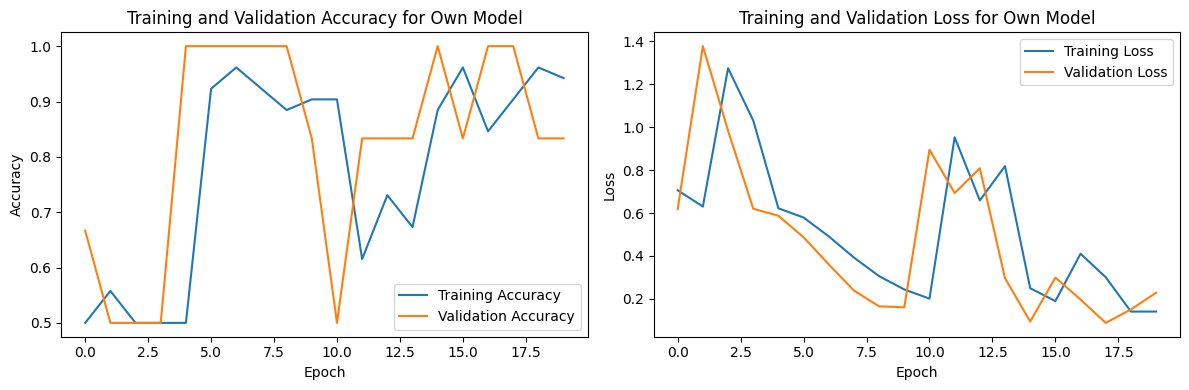

In [206]:
train_accuracy = history_ownModel.history['accuracy']
val_accuracy = history_ownModel.history['val_accuracy']
train_loss = history_ownModel.history['loss']
val_loss = history_ownModel.history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Own Model')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Own Model')
plt.legend()

plt.tight_layout()
plt.show()

### Model evaluation:
The accuracy scores are way better compared to base model at 0.73 after determing layers and parameters, but from the graph there is still a lot of overfitting to fix as the gaps between training and validation graphs are big.

# Handling overfitting:
We will add early stopping and dropout, as well as tune the learning rate.

In [207]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
ownModel_Tuned = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(131, 131, 3)),
    layers.MaxPooling2D((2, 2)),
    

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    layers.Flatten(),

    layers.Dense(120, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])


# Use a smaller learning rate with a learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.8
)

ownModel_Tuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10 ,min_delta=0.001,verbose=1)

In [208]:
# Train the model
history_ownTuned = ownModel_Tuned.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=100, callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = ownModel_Tuned.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# ownModel_Tuned.save_weights('ownModel_Tuned_CNN weights.h5')
#ownModel_Tuned.load_weights('ownModel_Tuned_CNN weights.h5')

Epoch 1/100
1/1 [==============================] - 1s 973ms/step - loss: 0.6929 - accuracy: 0.5769 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6605 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6765 - accuracy: 0.5769 - val_loss: 0.6477 - val_accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6366 - accuracy: 0.6154 - val_loss: 0.6307 - val_accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6508 - accuracy: 0.6346 - val_loss: 0.6001 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6066 - accuracy: 0.7500 - val_loss: 0.5457 - val_accuracy: 0.8333
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6013 - accuracy: 0.6538 - val_loss: 0.5009 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==

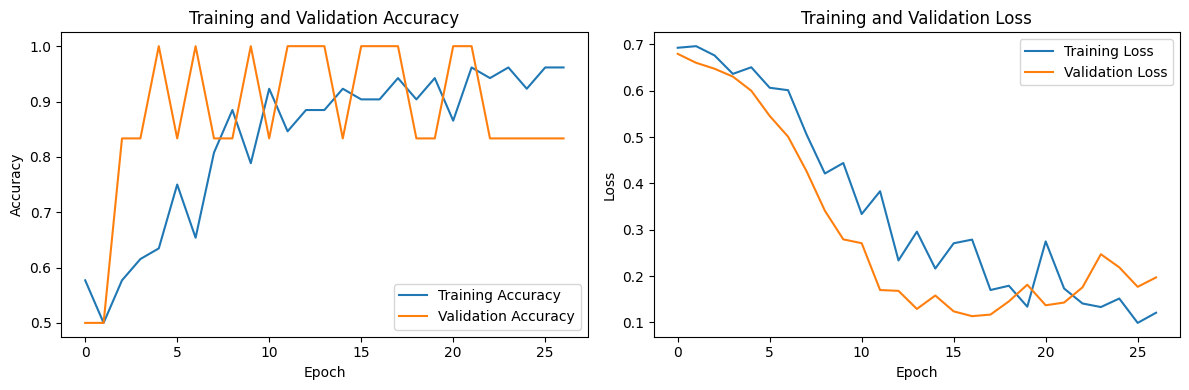

In [209]:
# Extracting training and validation accuracy and loss from the history object
#0.01 is btr
train_accuracy = history_ownTuned.history['accuracy']
val_accuracy = history_ownTuned.history['val_accuracy']
train_loss = history_ownTuned.history['loss']
val_loss = history_ownTuned.history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Model evaluation:
After doing some tuning, adding early stoping and dropout, the accuracy score jumped from 0.73 to 0.88, and the graphs for training and validation are closer for both accuracy and loss, and the graphs are almost touching at the end showing less overfitting

# Augmentation:
Artificially increasing the diversity of the training dataset by rotating, flipping, scaling the images.

In [210]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    # rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # Try training without horizontal flipping
    fill_mode='reflect'
)


datagen.fit(X_train)
aug_data = datagen.flow(X_train,y_train, batch_size=100)
X_train_aug, y_train_aug = next(aug_data)

#Combine with org data
X_train_combined = np.concatenate((X_train, X_train_aug), axis=0) 
y_train_combined = np.concatenate((y_train, y_train_aug), axis=0)

In [211]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks

# Define the model
ownModel_Tuned1 = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(131, 131, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(120, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the model with a fixed learning rate
ownModel_Tuned1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Fixed learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)

# Train the model
history_ownTuned_aug = ownModel_Tuned1.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val, y_val),
    batch_size=100,
    epochs=100,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_accuracy = ownModel_Tuned1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Save the model
ownModel_Tuned1.save('ownModel_Tuned1_no_lr_schedule.h5')


Epoch 1/100
2/2 [==============================] - 1s 127ms/step - loss: 0.7055 - accuracy: 0.5096 - val_loss: 0.7422 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.8343 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6800 - accuracy: 0.5865 - val_loss: 0.6896 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.7186 - accuracy: 0.4423 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6953 - accuracy: 0.4712 - val_loss: 0.6760 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6600 - accuracy: 0.5769 - val_loss: 0.6671 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6937 - accuracy: 0.4904 - val_loss: 0.6525 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [212]:
# import tensorflow as tf
# from tensorflow.keras import layers, callbacks

# # Define the model
# ownModel_Tuned1 = tf.keras.Sequential([
#     layers.Conv2D(16, (3, 3), activation='relu', input_shape=(131, 131, 3)),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),

#     layers.Dense(120, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(2, activation='softmax')
# ])

# # Compile the model with a fixed learning rate
# ownModel_Tuned1.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Use a fixed learning rate
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Early stopping callback
# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)

# # Train the model
# history_ownTuned_aug = ownModel_Tuned1.fit(
#     X_train_combined, y_train_combined, 
#     validation_data=(X_val, y_val),
#     batch_size=100,
#     epochs=100,
#     callbacks=[early_stopping]
# )

# # Evaluate the model on the test data
# test_loss, test_accuracy = ownModel_Tuned1.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_accuracy}')

# # Save the model
# ownModel_Tuned1.save('ownModel_Tuned1_no_lr_schedule.h5')


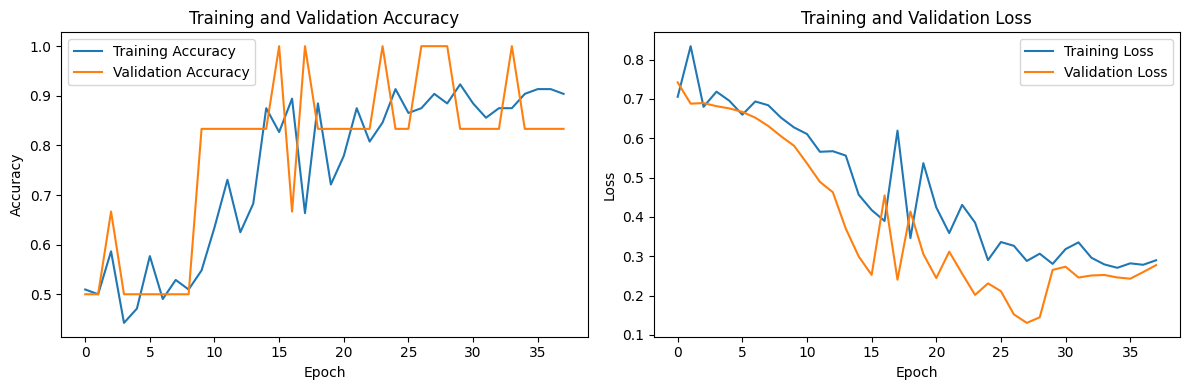

In [213]:
#Extracting training and validation accuracy and loss from the history object
#0.01 is btr
train_accuracy = history_ownTuned_aug.history['accuracy']
val_accuracy = history_ownTuned_aug.history['val_accuracy']
train_loss = history_ownTuned_aug.history['loss']
val_loss = history_ownTuned_aug.history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()